<a href="https://colab.research.google.com/github/mintseok/MachineLearning/blob/main/Deep%20Learnig%20from%20Scratch%202/Spiral_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive Mount 시키기 + 디렉토리 만들기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd "/content/drive/My Drive"

/content/drive/My Drive


In [3]:
mkdir "밑시딥2"

mkdir: cannot create directory ‘밑시딥2’: File exists


In [4]:
cd "밑시딥2"

/content/drive/My Drive/밑시딥2


# 밑시딥 2 클론 해오기

In [5]:
!git clone https://github.com/deeplearningfromscratch2/deep-learning-from-scratch-2.git

fatal: destination path 'deep-learning-from-scratch-2' already exists and is not an empty directory.


In [6]:
cd /content/drive/MyDrive/밑시딥2/deep-learning-from-scratch-2

/content/drive/MyDrive/밑시딥2/deep-learning-from-scratch-2


# Spiral.py 불러오기 + 시각화

In [7]:
from dataset import spiral

import matplotlib.pyplot as plt
x, t = spiral.load_data() # x가 data, t가 label
print('x', x.shape) # (300, 2)
print('t', t.shape) # (300, 3)

x (300, 2)
t (300, 3)


one-hot encoding에서 inverse로 -> meshgrid에서 활용하기 위해서

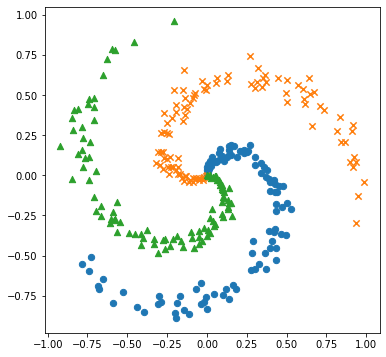

In [8]:
import numpy as np
x, t = spiral.load_data() # x가 data, t가 label
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
plt.figure(figsize=(6,6))
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

# 이 데이터셋을 학습시킬 신경망 구현하기: TwoLayerNet -- SoftmaxWithLoss

In [9]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss
from collections import OrderedDict

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size # 뉴런 수를 의미한다

    # 가중치와 편향 초기화
    W1 = 0.01 * np.random.randn(I,H) # input_size, hidden_size의 dimension에 맞춰서 random 행렬 생성
    b1 = np.zeros(H)
    W2 = 0.01 * np.random.randn(H,O)
    b2 = np.zeros(O)

    # 계층 생성
    self.layers = [
        Affine(W1,b1),
        Sigmoid(),
        Affine(W2,b2)
    ]
    self.loss_layer = SoftmaxWithLoss() # SoftmaxWithLoss()는 layers 바깥쪽에 저장해준다.

    # 모든 가중치와 기울기를 리스트에 모은다
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x
  
  def forward(self, x, t):
    score = self.predict(x)
    loss = self.loss_layer.forward(score, t)
    return loss

  def backward(self, dout=1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1 : t = np.argmax(t, axis=1)
    
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

# 학습시키기

In [ ]:
from common.optimizer import SGD

# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data() # x가 data, t가 label
#t = np.argmax(t, axis=1) # one-hot label에서 정답 label로 변환
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
  # 데이터 뒤섞기
  idx = np.random.permutation(data_size)
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    batch_x = x[iters*batch_size:(iters+1)*batch_size]
    batch_t = t[iters*batch_size:(iters+1)*batch_size]

    # 기울기를 구해 매개변수 갱신
    #print(batch_x.size, batch_t.size, model)
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

    total_loss += loss
    loss_count += 1

    # 정기적으로 학습 결과 출력
    if(iters+1) % 10 == 0:
      avg_loss = total_loss / loss_count
      print("epoch %d  |  iter %d / %d  |  loss %.2f" %(epoch+1, iters+1, max_iters, avg_loss))
      loss_list.append(avg_loss)
      total_loss, loss_count = 0, 0

# loss 값 시각화하기

In [11]:
np.asarray(loss_list).shape

(300,)

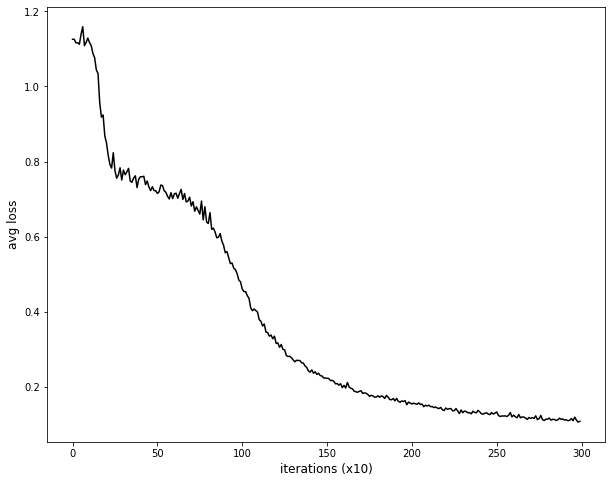

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(loss_list, color='black')
plt.xlabel("iterations (x10)", fontsize=12)
plt.ylabel("avg loss", fontsize=12)
plt.show()

# Meshgrid를 이용해서 decision boundary 시각화하기

In [13]:
t.shape

(300, 3)

In [17]:
# x,y 축의 경계 정해주기
min1, max1 = x[:, 0].min(), x[:, 0].max()
min2, max2 = x[:, 1].min(), x[:, 1].max()

x1 = np.linspace(min1, max1)
x2 = np.linspace(min2, max2)

# meshgrid를 이용해서 figure 위에 놓을 grid 생성해주기
xx, yy = np.meshgrid(x1, x2)

# model.predict에 넣을 데이터 합쳐주기
grid = np.c_[xx.ravel(), yy.ravel()]

# 예측시키기
yhat = model.predict(grid)
yhat = np.argmax(yhat, axis=1)
print(grid.shape, yhat.shape, xx.shape)

# 학습시긴 값을 grid에 reshape 하기
print(yhat)
zz = yhat.reshape(xx.shape)

(2500, 2) (2500,) (50, 50)
[0 0 0 ... 1 1 1]


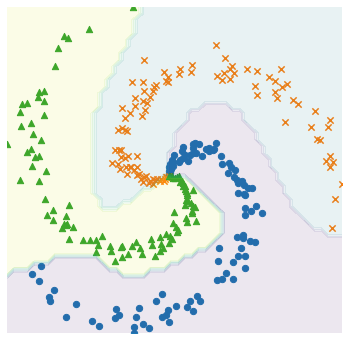

In [22]:
import numpy as np
x, t = spiral.load_data() # x가 data, t가 label
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
plt.figure(figsize=(6,6))
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])

plt.contourf(xx, yy, zz, alpha=0.1)
plt.axis('off')
plt.show()